# 🧑🏻‍🏫 DataBlock and Dataloaders

## What are Dataloaders?
>Dataloaders are replacements for `Pytorchs` [DataLoader Class](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoaderhttps://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader), but with more functionality and flexibility. They help you to investigate, clean, change and prepare you data.
- You need a DataLoader to build your `Fastai` model
- needs at least 1 argument: `source="path_to_dataset`
- think of it as a recipe about the steps you took from getting your data till using your data
    - often: new data will be used in the future to improve the model 
    - a DataLoader is then like a pipeline you can throw in your data without needing to remember every step
- DataLoader requires DataBlocks 👇🏻

#### class `DataLoader`
>DataLoader(__dataset__=None, __bs__=None, __num_workers__=0, __pin_memory__=False, __timeout__=0, __batch_size__=None, __shuffle__=False, __drop_last__=False, __indexed__=None, __n__=None, __device__=None, __persistent_workers__=False, __wif__=None, __before_iter__=None, __after_item__=None, __before_batch__=None, __after_batch__=None, __after_iter__=None, __create_batches__=None, __create_item__=None, __create_batch__=None, __retain__=None, __get_idxs__=None, __sample__=None, __shuffle_fn__=None, __do_batch__=None) :: [GetAttrclass](https://fastcore.fast.ai/basics#GetAttrhttps://fastcore.fast.ai/basics#GetAttr)    

✏️ source=_"path_to_dataset"_ (if not already set in DataBlock)


## What are Datablocks?
>DataBlocks are blueprints on how to assemble data. 
- necessary for building DataLoaders
- consist of at least 4 parts:
    1. data type (e.g. images or categorical data) 
    2. location (e.g. file path)
    3. feature and labels (how to retrieve input data and labels)
    4. validation set (percentage of images held back for validation)

#### class `DataBlock`
>DataBlock(__blocks__=None, __dl_type__=None, __getters__=None, __n_inp__=None, __item_tfms__=None, __batch_tfms__=None, __get_items__=None, __splitter__=None, __get_y__=None, __get_x__=None)

✏️ blocks
✏️ get_items
✏️ get_y 
✏️ splitter

## Why do we need DataLoaders?
>It is said: up to 90% of coding time belongs to data cleaning
- more data handling functionalities → less time for cleaning the data
- Fast.ai requires it

### Workflow for Datasetup:
1️⃣ `Import Libraries` → 2️⃣ `Download/Source your data` → 3️⃣ `DataBlock` → 4️⃣ `DataLoader` → 5️⃣ `Data Munging` → ... 🚀 _`Build Model`_


---

# 🎬 Simple Use Case: ugly cat classifier 🙀🐈

## 1️⃣ Import Libraries

#### Import the usual suspects ... 👻🧛‍♀️🧟

In [31]:
# Standard library imports
# -

# Third party imports
# -

# Model specific imports
from fastbook import * 

# Local application imports
# -

# Global notebook settings
%matplotlib inline 

#### And some new friends ... 🧞‍♀️🧚‍♂️🦄

In [48]:
#!pip install DuckDuckGoImages

In [1]:
import DuckDuckGoImages as ddg
# Source: https://pypi.org/project/DuckDuckGoImages/

## 2️⃣ Download Data
>Create folders with the name of the labels and save/download the corresponding images into these folders ...

In [24]:
# Make directories for images
#! mkdir "downloads/cats" #parent directory
#! mkdir "downloads/cats/prettycats"
#! mkdir "downloads/cats/uglycats"

In [9]:
# Download Images from DuckDuckGo Image Search
ddg.download('kittens', max_urls=40, folder="downloads/cats/prettycats")
ddg.download('ugly cats', max_urls=40, folder="downloads/cats/uglycats")

20

In [2]:
ddg.download('daisy flower', max_urls=400, folder="downloads/flowers/daisy")
#ddg.download('ugly cats', max_urls=40, folder="downloads/cats/uglycats")

173

In [33]:
print("Files in prettycats: ", len(os.listdir("downloads/cats/prettycats")))
print("Files in prettycats: ", len(os.listdir("downloads/cats/uglycats")))

Files in prettycats:  49
Files in prettycats:  21


## 3️⃣ Build DataBlock

In [35]:
path_to_data = "downloads/cats"

# Create DataBlock
cats = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=30), # 20% validation set / seed for replication
    get_y=parent_label,
    item_tfms=Resize(128))

In [34]:
# Summary of DataBlock
cats.summary(path_to_data)

Setting-up type transforms pipelines
Found 69 items
2 datasets of sizes 56,13
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      downloads/cats/prettycats/7d4335bd593d4ffdae407b74da284ec9.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=1024x680
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      downloads/cats/prettycats/7d4335bd593d4ffdae407b74da284ec9.jpg
    applying parent_label gives
      prettycats
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(0)

Final sample: (PILImage mode=RGB size=1024x680, TensorCategory(0))


Found 69 items
2 datasets of sizes 56,13
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting

## 4️⃣ Build DataLoader

In [36]:
# Creeate DataLoader
dls = cats.dataloaders(
    source=path_to_data,
    bs = 8) #Batch Size (default=64))

## 5️⃣ Investigate, Clean, Change the Data

#### Show Images in batches

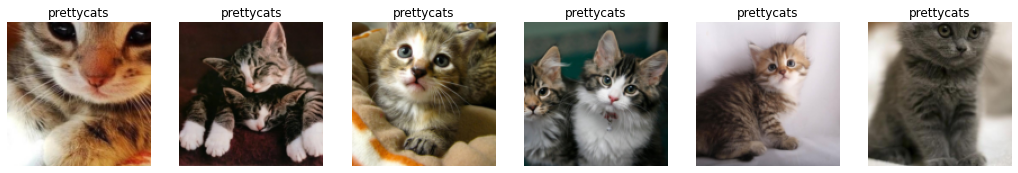

In [37]:
dls.train.show_batch(max_n=6, nrows=1)

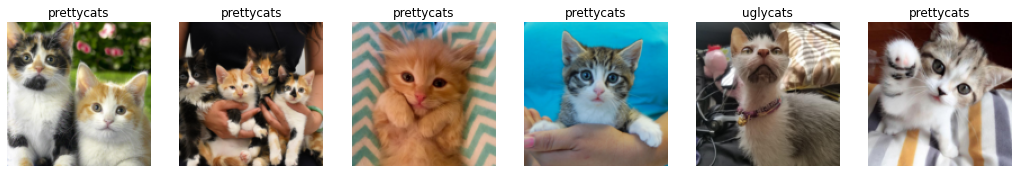

In [38]:
dls.valid.show_batch(max_n=6, nrows=1)

#### Show Labels

In [39]:
#Show labels
dls.vocab

['prettycats', 'uglycats']

#### Investigate Datasets

In [40]:
# investigate training/validation dataset
print("Train:\n=============\n",dls.train.dataset)
print("\nValid:\n=============\n", dls.valid.dataset)
print("\nNo 8 Image in Valid:\n=============\n", dls.valid.dataset[8])

Train:
 (#56) [(PILImage mode=RGB size=1024x680, TensorCategory(0)),(PILImage mode=RGB size=800x548, TensorCategory(1)),(PILImage mode=RGB size=800x600, TensorCategory(0)),(PILImage mode=RGB size=1920x1200, TensorCategory(0)),(PILImage mode=RGB size=800x600, TensorCategory(1)),(PILImage mode=RGB size=1440x1280, TensorCategory(0)),(PILImage mode=RGB size=700x467, TensorCategory(1)),(PILImage mode=RGB size=960x640, TensorCategory(0)),(PILImage mode=RGB size=678x1024, TensorCategory(0)),(PILImage mode=RGB size=1600x1000, TensorCategory(0))...]

Valid:
 (#13) [(PILImage mode=RGB size=1600x1116, TensorCategory(0)),(PILImage mode=RGB size=1889x1260, TensorCategory(0)),(PILImage mode=RGB size=900x900, TensorCategory(0)),(PILImage mode=RGB size=1325x1320, TensorCategory(0)),(PILImage mode=RGB size=980x735, TensorCategory(1)),(PILImage mode=RGB size=605x605, TensorCategory(0)),(PILImage mode=RGB size=1083x1280, TensorCategory(0)),(PILImage mode=RGB size=1600x1200, TensorCategory(0)),(PILImage m

In [41]:
# Print path of images (here in validation set)
dls.valid.items[0:5]

[Path('downloads/cats/prettycats/ab194021730346a48a5fd62ee59a05ef.jpg'),
 Path('downloads/cats/prettycats/b5efb20ba4754e308c8e0d6e4d3a8df8.jpg'),
 Path('downloads/cats/prettycats/8a9a0c86ddc040ea94402f0feaf467ef.jpg'),
 Path('downloads/cats/prettycats/06dcf2fbaa0f4bb0a2a6f90185e58ef1.jpg'),
 Path('downloads/cats/uglycats/4a1698b1b144440da79825956ebcca1d.jpg')]

#### Print number of Images

In [42]:
# Size of Datasets
print("Total: ", dls.n)
print("Train: ", dls.train.n)
print("Val: ", dls.valid.n)

Total:  56
Train:  56
Val:  13


#### Find and eliminate broken Images

In [43]:
! cd downloads/cats/uglycats; touch "BROKEN_IMG.jpg"; ls

239a35ab245e4be6995976cfe140f873.jpg a6d35b2f763a4011b5cf49bdc9772cba.jpg
2f64784c7eb54d5ea01f628bb5ca5883.jpg b1163011888846acacbf28d7bd24463b.jpg
33af6c1a47344e40b44335eb48b2e631.jpg b51ae380b96340afb0eb090c5c1718ad.jpg
3ed5e2ebf5a74bccb1e642a5a9bf271c.jpg cf8001a675894f5dbc44ba079fc9855f.jpg
435d212567714a06bcf202027a7908ad.jpg d17787af06a04cadb8779bdd9fe12234.jpg
4a1698b1b144440da79825956ebcca1d.jpg dd049ecee8ba4139ab37ad40737bc71f.jpg
4a2a17e700e54405a9610960acf08b39.jpg deb02a0d28ee49b097f1b8379e5ee96e.jpg
4f3376b54e5b429884a08a8418071ee8.jpg f0fc610282744bcf9cd0745d67e0992a.jpg
4ffd5ae1c6784d2c81996453239cacb5.jpg f484e02c572e4b1fb08f63411c80d954.jpg
557c1e38106a40b3a8486f2d1f5f0cb4.jpg fe41fcfa69a045018d1bfd130aad5d5c.jpg
BROKEN_IMG.jpg


In [44]:
#check for broken images and delete if necessary
fns = get_image_files(path_to_data)
failed = verify_images(fns)
print(failed)

[Path('downloads/cats/uglycats/BROKEN_IMG.jpg')]


In [45]:
failed.map(Path.unlink)

(#1) [None]

#### Convert Images to b&w

In [46]:
# Create DataBlock
cats_bw = DataBlock(
    blocks=(ImageBlock(cls=PILImageBW), CategoryBlock), #cls=PILImageBW
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

# Create DataLoader
dls_bw = cats_bw.dataloaders(
    source = path_to_data,
    bs = 8) 

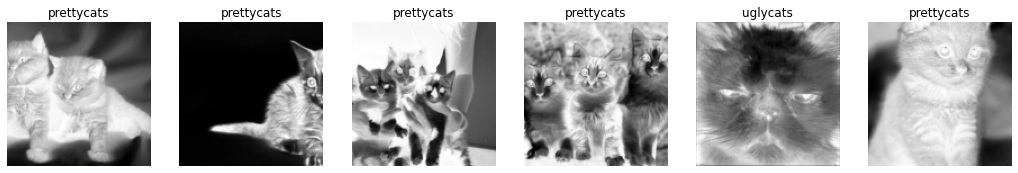

In [47]:
# Show sample b&w images in training set
dls_bw.train.show_batch(max_n=6, nrows=1)

---
# 📚 References
- [Fast.Ai __DataLoader__ Documentation](https://docs.fast.ai/data.load.html)
- [Fast.Ai __DataBlock__ Documentation](https://docs.fast.ai/data.block.html)

---
# ⛹️‍♂️Coding Backyard 

empty 
🏜🌵🐪